In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

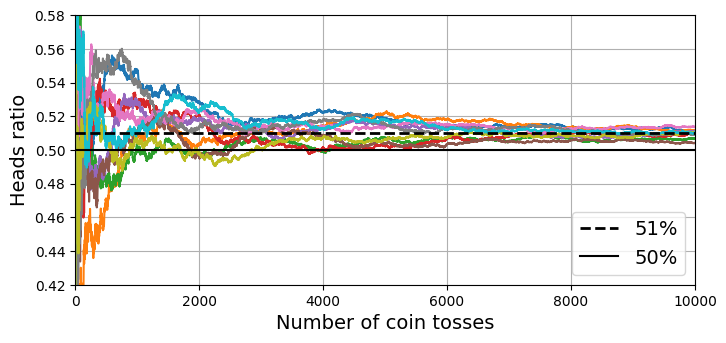

In [2]:

import matplotlib.pyplot as plt
import numpy as np

heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.grid()
# save_fig("law_of_large_numbers_plot")
plt.show()

Voting Classifier

In [3]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X,y = make_moons(n_samples=500, noise=0.30, random_state = 42)
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42)

voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [4]:
X_train.shape

(375, 2)

In [5]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

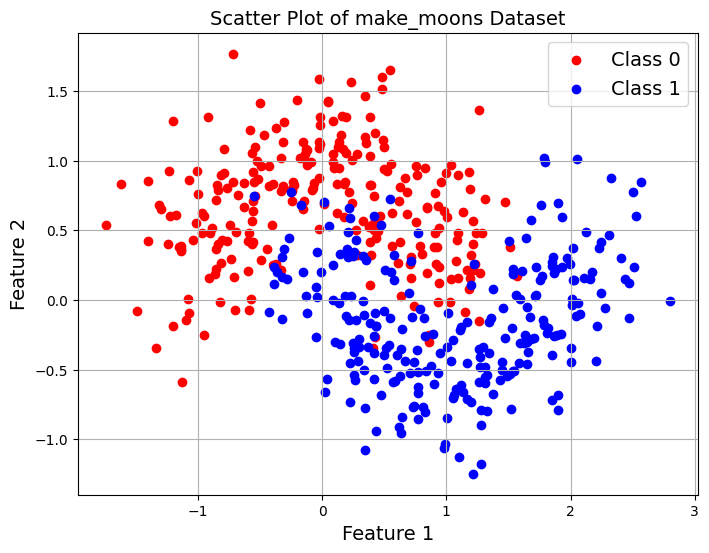

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='b', label='Class 1')
plt.title('Scatter Plot of make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
X[2]

array([ 1.16402213, -0.45552558])

In [8]:
for name, clf in voting_clf.named_estimators_.items():
  print(name,"=",clf.score(X_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [9]:
voting_clf.predict(X_test[:2])

array([1, 0])

Hard voting:
* Uses discrete class labels for predictions.
* Makes the final decision based on the majority vote of individual classifiers.

In [10]:
[clf.predict(X_test[:2]) for clf in voting_clf.estimators_]

[array([1, 0]), array([1, 0]), array([0, 0])]

In [11]:
voting_clf.score(X_test, y_test)

0.912

Soft Voting:
* Uses probabilities for predictions.
* Considers the confidence levels of individual classifiers when making the final decision.

In [12]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.92

Bagging and Pasting

Bagging : use same training algorithm in different sample of the dataset with replacement (Bootstrapping and Aggregation)

Pasting: same but without replacement

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 500, max_samples = 100,n_jobs = -1, random_state=42)
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

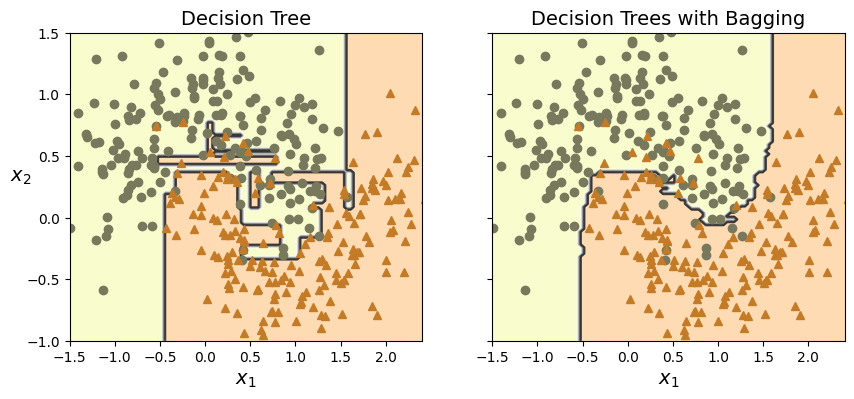

In [14]:
def plot_decision_boundary(clf,X,y,alpha=1.0):
  axes=[-1.5,2.4,-1,1.5]
  x1,x2 = np.meshgrid(np.linspace(axes[0],axes[1],100),
                      np.linspace(axes[2], axes[3], 100))
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
  plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
  colors = ["#78785c", "#c47b27"]
  markers = ("o", "^")
  for idx in (0, 1):
      plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                color=colors[idx], marker=markers[idx], linestyle="none")
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_2$", rotation=0)


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()


Out-of-Bag evaluation


In [15]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, oob_score = True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.896

In [16]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.92

In [17]:
bag_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

In [18]:
# extra code – shows how to compute the 63% proba
print(1 - (1 - 1 / 1000) ** 1000)
print(1 - np.exp(-1))

0.6323045752290363
0.6321205588285577


Random Patches


In [19]:
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap=True,
    max_features = 0.5,
    bootstrap_features = True,
    random_state=42
)

In [20]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print('Random Patches Classifier', accuracy_score(y_test,y_pred))

Random Patches Classifier 0.88


Bagging Tips:
* Bagging generally gives better results than patching
* Good results come around the 25% to 50% row sampling mark
* Random Patches and subspaces should be used while dealing with high dimension data
* To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

# Applying GridSearchCV


In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
parameters = {
    'n_estimators':[50,100,500],
    'max_samples':[0.1,0.4,0.7,1.0],
    'bootstrap':[True,False],
    'max_features':[0.1,0.4,0.7,1.0]
}

In [23]:
search = GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [24]:
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [25]:
search.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 0.4,
 'n_estimators': 50}

In [26]:
search.best_score_

0.9279999999999999

## Random Forests

In [28]:
  from sklearn.ensemble import RandomForestClassifier

   rnd_clf = RandomForestClassifier(n_estimators= 500, max_leaf_nodes = 16, n_jobs=-1, random_state=42)
   rnd_clf.fit(X_train,y_train)

   y_pred_rf = rnd_clf.predict(X_test)
   print(accuracy_score(y_test,y_pred_rf))

0.912


A Random Forest is equivalent to a bag of decision trees:

In [33]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
                            n_estimators=500,n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train)
y_pred_bag = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_bag))

0.912


##Feature Importance


In [53]:
from sklearn.datasets import load_iris


iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=500, random_state=42)

In [38]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [39]:
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
  print(round(score,2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


In [54]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

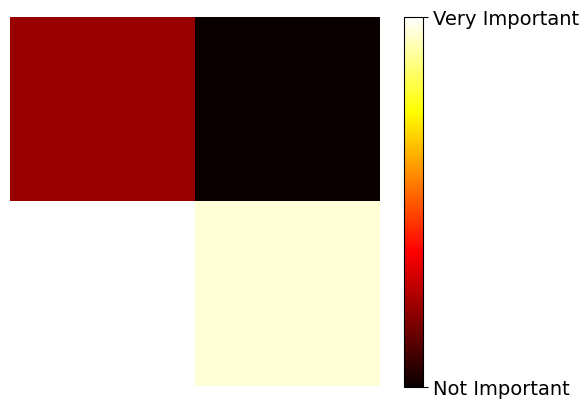

In [55]:
heatmap_image= rnd_clf.feature_importances_.reshape(2,2)
plt.imshow(heatmap_image, cmap="hot")

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not Important", "Very Important"],fontsize = 14)
plt.axis("off")
plt.show()

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
# same as Random forest but bootstrap is always false by default
# it trades more bias for low varience
etc_clf = ExtraTreesClassifier(n_estimators= 500, max_leaf_nodes = 16, n_jobs=-1, random_state=42)
etc_clf.fit(X_train,y_train)

y_pred_etc = etc_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_etc))

0.912


In [42]:
#heatmap of features of MNIST dataset

from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y = True, as_frame=False,parser='auto')

rnd_clf = RandomForestClassifier(n_estimators=500,random_state=42)
rnd_clf.fit(X_mnist,y_mnist)

RandomForestClassifier(n_estimators=500, random_state=42)

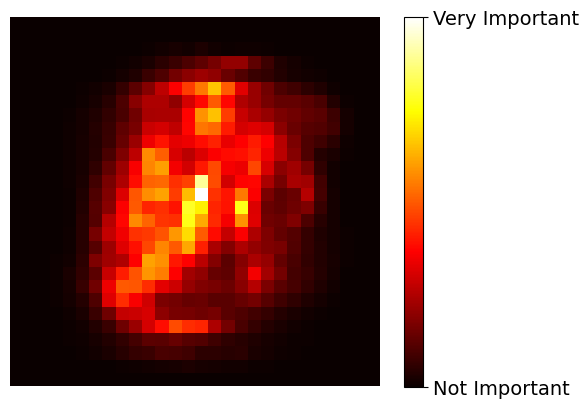

In [52]:
heatmap_image= rnd_clf.feature_importances_.reshape(28,28)
plt.imshow(heatmap_image, cmap="hot")

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not Important", "Very Important"],fontsize = 14)
plt.axis("off")
plt.show()

In [ ]:
rnd_clf.feature_importances_.reshape(28,28)

##Boosting


AdaBoost

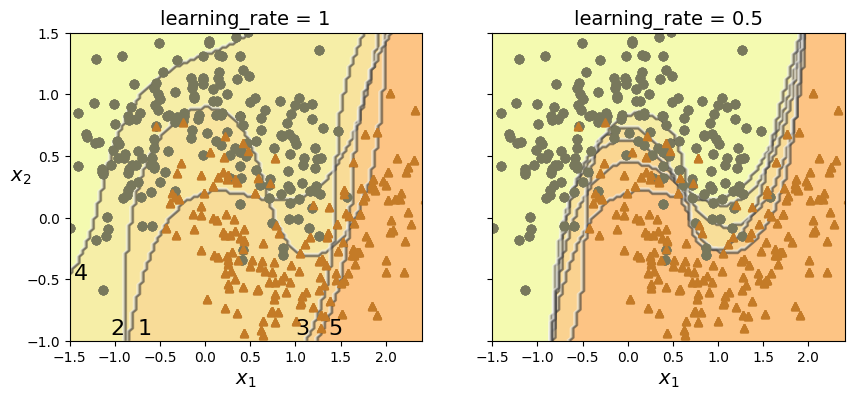

In [56]:
m = len(X_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        error_weights = sample_weights[y_pred != y_train].sum()
        r = error_weights / sample_weights.sum()  # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r)  # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha)  # equation 7-3
        sample_weights /= sample_weights.sum()  # normalization step

        plot_decision_boundary(svm_clf, X_train, y_train, alpha=0.4)
        plt.title(f"learning_rate = {learning_rate}")
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=16)
        plt.text(-1.05, -0.95, "2", fontsize=16)
        plt.text(1.0, -0.95, "3", fontsize=16)
        plt.text(-1.45, -0.5, "4", fontsize=16)
        plt.text(1.36,  -0.95, "5", fontsize=16)
    else:
        plt.ylabel("")

plt.show()

In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=30,
    learning_rate=0.5,random_state=42)


ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [59]:
y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_ada))

0.904


In [60]:
print(accuracy_score(y_pred_ada,y_test))

0.904


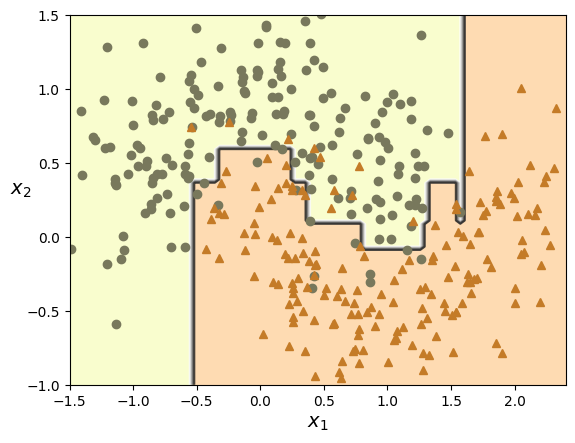

In [61]:
plot_decision_boundary(ada_clf, X_train, y_train)

Gradient Boosting


Instead of tweaking the instance weight at every iteration like AdaBoost does, this method tries to fit the new predictor the residual error made by the previous predictor.

In [67]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0] ** 2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [66]:
X[:,0].shape

(100,)

In [68]:
y2 = y- tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [69]:
y3 = y- tree_reg1.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [75]:
X_new = np.array([[-0.4],[0.],[0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([ 0.48779682, -0.05722975,  0.60839441])

In [76]:
tree_reg1.predict(X_new)

array([0.48779682, 0.12356613, 0.52856846])

In [77]:
tree_reg2.predict(X_new)

array([-4.31753398e-17, -9.03979359e-02,  3.99129745e-02])

In [78]:
tree_reg3.predict(X_new)

array([-4.31753398e-17, -9.03979359e-02,  3.99129745e-02])

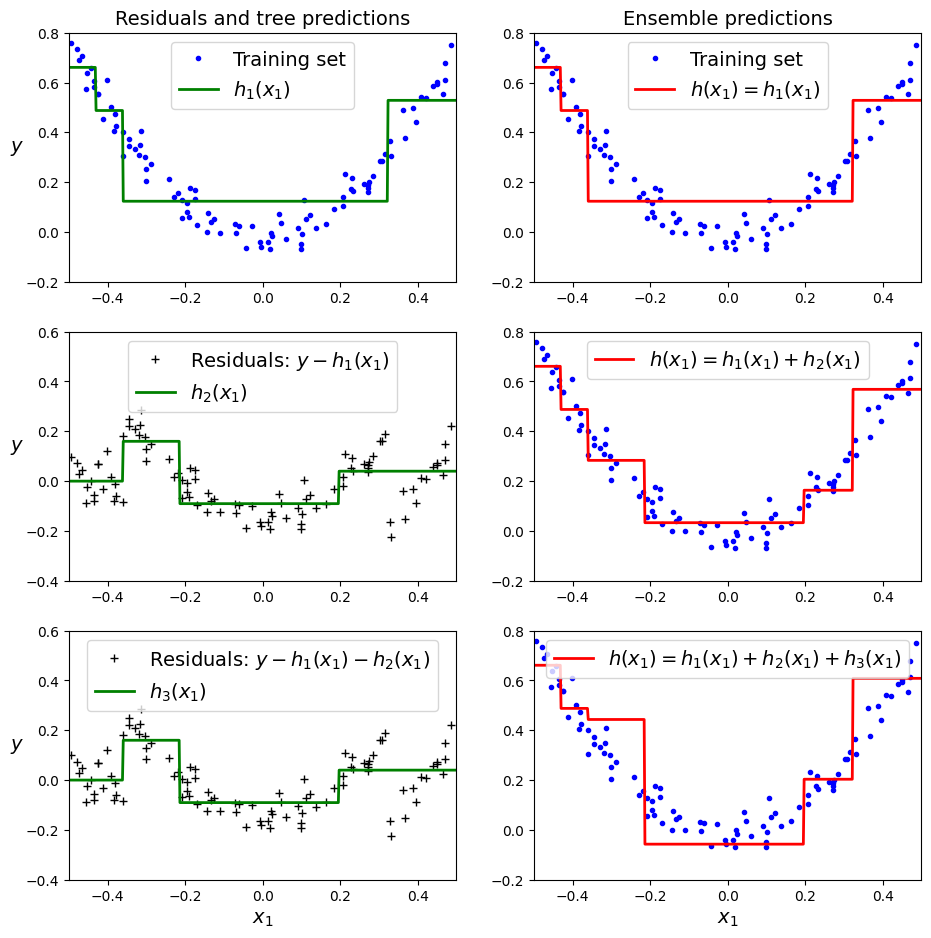

In [79]:
def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="g-",
                 label="$h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$  ", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_2(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8],
                  style="r-", label="$h(x_1) = h_1(x_1) + h_2(x_1)$")

plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_3(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")


plt.show()

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [85]:
gbrt_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500, n_iter_no_change = 10, random_state=42)
gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [87]:
gbrt_best.n_estimators_

92

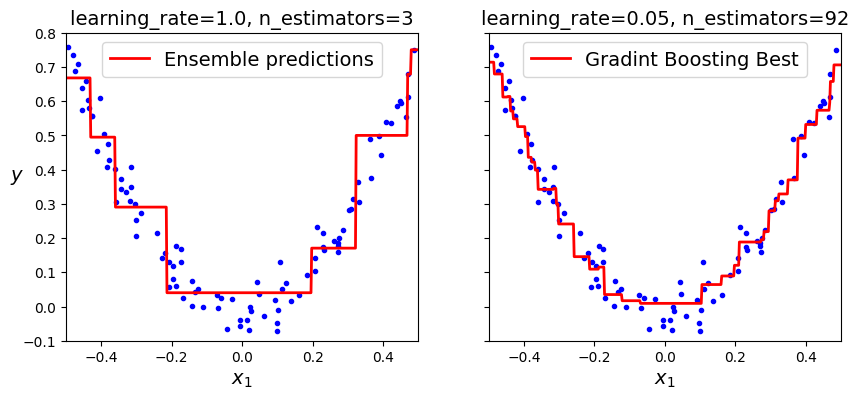

In [91]:
# extra code – this cell generates and saves Figure 7–10

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate}, "
          f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",label="Gradint Boosting Best")
plt.title(f"learning_rate={gbrt_best.learning_rate}, "
          f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

plt.show()

##Stacking


In [95]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [96]:
stacking_clf.score(X_test, y_test)

0.928